# NAME - ASWIN RAJ
#REG NO - 20MID0009
#CAMPUS- VIT VELLORE

**2. Load the dataset.**

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# 3)PERFORM BELOW VISULAIZATIONS

**1)UNIVARIATE ANALYSIS**

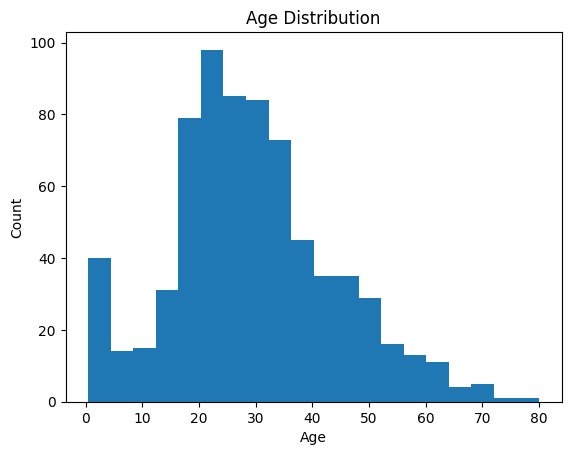

In [2]:
import matplotlib.pyplot as plt
plt.hist(df['age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


**2)BIVARIATE ANALYSIS**

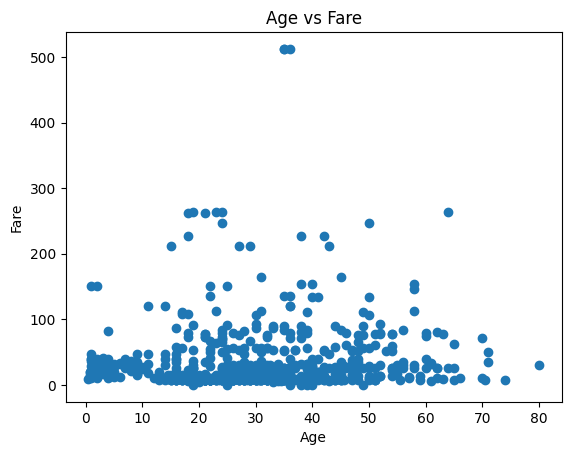

In [4]:
filtered_df = df.dropna(subset=['age', 'fare'])
plt.scatter(filtered_df['age'], filtered_df['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()


**3)MULTIVARIATE ANALYSIS**

<ipython-input-5-0283f601a8af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


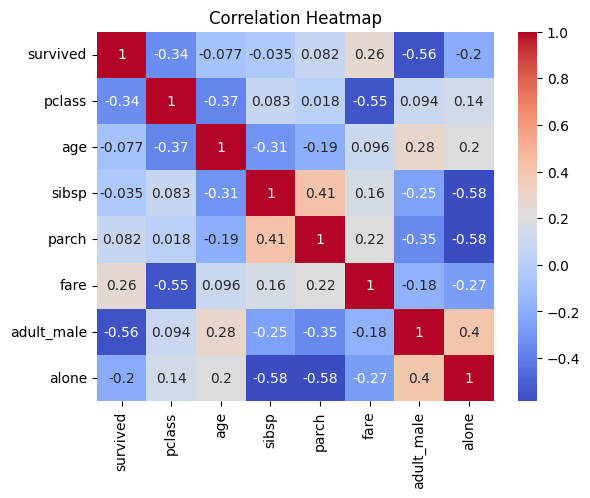

In [5]:
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**4. Perform descriptive statistics on the dataset.**

In [6]:
desc_stats = df.describe()
print(desc_stats)


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


**5. Handle the Missing values**

In [8]:
df['age'].fillna(df['age'].mean(), inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**6. Find the outliers and replace the outliers**

In [9]:
import numpy as np
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['age'] = np.where((df['age'] < lower_bound) | (df['age'] > upper_bound), df['age'].median(), df['age'])


**7. Check for Categorical columns and perform encoding**

In [10]:
encoded_df = pd.get_dummies(df, columns=['sex', 'embarked'])


**8. Split the data into dependent and independent variables**

In [11]:
X = encoded_df.drop('alive', axis=1)  
y = encoded_df['alive']  


**9. Scale the independent variables**

In [14]:
from sklearn.preprocessing import StandardScaler
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_scaled = X.copy() 
X_scaled[numeric_columns] = scaler.fit_transform(X_scaled[numeric_columns])



**10.Split the data into training and testing**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)